# Exploratory Data Analysis (EDA) for Sentiment Analysis on Mental Health Dataset

This notebook explores the cleaned mental health dataset to understand its structure, distribution, and important patterns before modeling. EDA includes inspecting field types, examining class distributions, analyzing text properties, and visualizing trends. These insights offer essential context about data quality and inform the design of effective predictive models.

## 1. Importing Libraries

In [12]:
print("Process Start: Importing core libraries for analysis and NLP visualizations...")
import time
start = time.time()

import pandas as pd                        
import matplotlib.pyplot as plt           
import seaborn as sns                      
from collections import Counter            
from wordcloud import WordCloud              
from sklearn.feature_extraction.text import CountVectorizer 
import logging
import re                                   

print(f"✓ Libraries imported successfully (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Importing core libraries for analysis and NLP visualizations...
✓ Libraries imported successfully (Time taken: 0.00s)



## 2. Loading the Cleaned Dataset

In [14]:
print("Process Start: Loading cleaned mental health dataset...")
start = time.time()

try:
    df = pd.read_csv("cleaned_dataset.csv")
    print(f"✓ Dataset loaded: {df.shape[0]} records (Time taken: {time.time()-start:.2f}s)\n")
except FileNotFoundError:
    logging.error("cleaned_dataset.csv not found in working directory.")
    raise
except Exception as e:
    logging.error(f"ERROR: {e}")
    raise

Process Start: Loading cleaned mental health dataset...
✓ Dataset loaded: 45261 records (Time taken: 0.16s)



## 3. Basic Overview
Print the dataset's shape, its column names, and display a preview of the first few rows.

In [17]:
print("Process Start: Displaying basic overview of loaded dataset...")
start = time.time()

print("Shape:", df.shape)                       
print("Columns:", df.columns.tolist())           
print(df.head())                             

print(f"✓ Dataset overview displayed (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Displaying basic overview of loaded dataset...
Shape: (45261, 3)
Columns: ['Unnamed: 0', 'statement', 'status']
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
✓ Dataset overview displayed (Time taken: 0.00s)



## 4. Class Distribution
*We examine the distribution of sentiment classes to check for imbalance, which can affect model fairness.*

Process Start: Visualizing and reporting class distribution in the dataset...


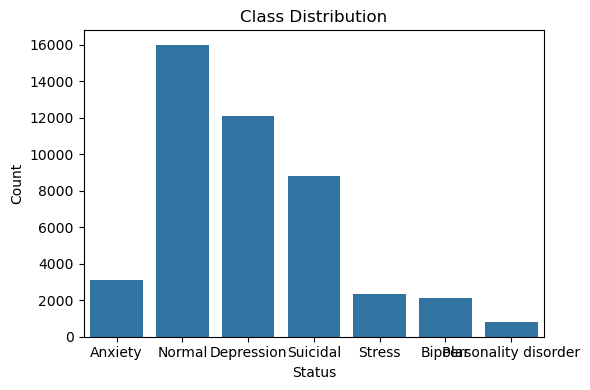

status
Normal                  15991
Depression              12106
Suicidal                 8812
Anxiety                  3103
Stress                   2343
Bipolar                  2118
Personality disorder      788
Name: count, dtype: int64
✓ Class distribution visualized and reported (Time taken: 0.21s)



In [19]:
print("Process Start: Visualizing and reporting class distribution in the dataset...")
start = time.time()

plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df)
plt.title("Class Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print(df['status'].value_counts())

print(f"✓ Class distribution visualized and reported (Time taken: {time.time()-start:.2f}s)\n")

*Decision Note: Exploring class counts reveals if upsampling, downsampling, or weighted models might be needed later.*

## 5. Text Length Analysis
*Statistical and visual analyses of statement lengths (mean, median, distribution) show if entries are mostly brief or detailed.*

Process Start: Visualizing and summarizing text length distribution...


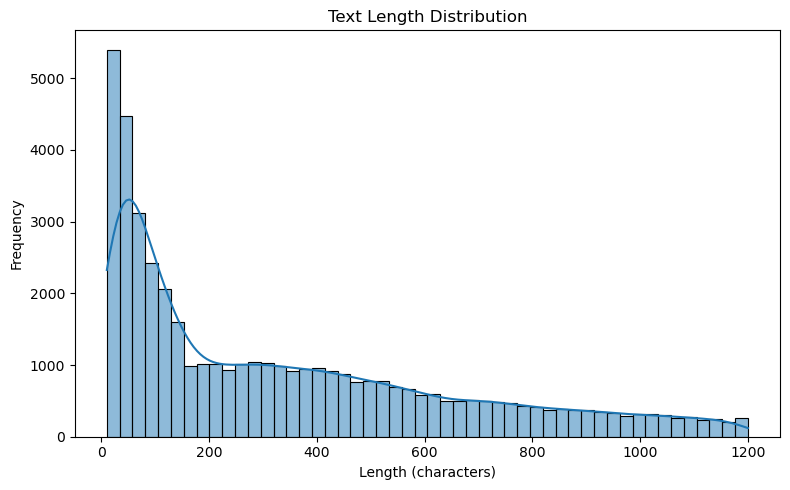

Mean Length: 337.93334217096395
Median Length: 238.0
✓ Text length analysis complete (Time taken: 0.38s)



In [21]:
print("Process Start: Visualizing and summarizing text length distribution...")
start = time.time()

df['text_length'] = df['statement'].str.len()
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print("Mean Length:", df['text_length'].mean())
print("Median Length:", df['text_length'].median())

print(f"✓ Text length analysis complete (Time taken: {time.time()-start:.2f}s)\n")

## 6. Short/Long Outlier Check

In [23]:
print("Process Start: Displaying shortest and longest samples in the dataset...")
start = time.time()

shortest_idx = df['text_length'].idxmin()
print("Shortest Sample:", df.loc[shortest_idx]['statement'])
print("Shortest Sample Length:", len(df.loc[shortest_idx]['statement']))

longest_idx = df['text_length'].idxmax()
print("Longest Sample:", df.loc[longest_idx]['statement'])
print("Longest Sample Length:", len(df.loc[longest_idx]['statement']))

print(f"✓ Shortest/longest samples displayed (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Displaying shortest and longest samples in the dataset...
Shortest Sample: oh my gosh
Shortest Sample Length: 10
Longest Sample: I was diagnosed as schizoaffective by a few different doctors. But I do not believe I have it. I am on a court order (CTO) and that means if I miss 1 injection, the cops come to my house and take me to hospital. I absolutely refuse to take my injection because I believe I do NOT have this illness. My mom came into my room today and said that my dad said I have been pretending to be sick and to "just give it up". He wants me to get out and work. And he is pissed that I am not going for my injection. He wants to kick me out on the streets because I "disgust" him. I do find this very weird because he is considered my substitute decision maker because I have been found "mentally incapable of making medical decisions" and he has NEVER said I was lying in the past to the psychiatrists. he is just saying this to my mother. But I have noticed that when

*Decision Note: Very short or excessively long statements can be removed or treated to maintain data relevance and quality. Since the current sample falls within acceptable limits, no additional cleaning is necessary.*

## 7. Example Samples per Class
*Viewing random statements from each sentiment provides intuition about content variation and label accuracy.*


In [25]:
print("Process Start: Showing one random example for each status class...")
start = time.time()

for label in df['status'].unique():
    example = df[df['status'] == label].sample(1)['statement'].values[0]
    print(f"Example for {label}: {example}\n")

print(f"✓ Example statements displayed (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Showing one random example for each status class...
Example for Anxiety: Being bad at something new gives me anxiety I know it’s contradictory but yeah. Not sure if this has to do with being a perfectionist or if it’s something else. I enjoy the “rush” of learning new things and knowing things, but when it push comes to shove and I need to practice what I’m learning, that’s when I usually find out I still have a long way to go and will have to fail and make mistakes and actually suck at that thing for a while. It’s like I just want to skip to the “good” part. I feel like the work is only productive/useful when it’s good.

How do you even deal with the uncomfortable parts of learning and growing? :( 

I just keep pushing on but sometimes it feels like I’m making no progress at all. And I know that “slow progress is still progress” but then my anxiety kicks in with bullsh*t like “other people are staying up and working their asses off while you’re celebrating a tiny step f

## 8. Most Frequent Words per Class
This section analyzes the most common words appearing in each of the main sentiment classes. Both word frequency counts and word clouds are generated to visualize the vocabulary characteristic of normal, anxiety, depression, and suicidal statements.


Top 25 words for class Normal: [('i', 9619), ('to', 8566), ('the', 8052), ('a', 5971), ('and', 5209), ('you', 3697), ('is', 3557), ('my', 3446), ('of', 3354), ('it', 3086), ('in', 2918), ('for', 2885), ('that', 2568), ('have', 2050), ('but', 1950), ('be', 1783), ('with', 1732), ('this', 1655), ('on', 1618), ('so', 1609), ('me', 1603), ('not', 1561), ('was', 1548), ('are', 1344), ('at', 1295)]


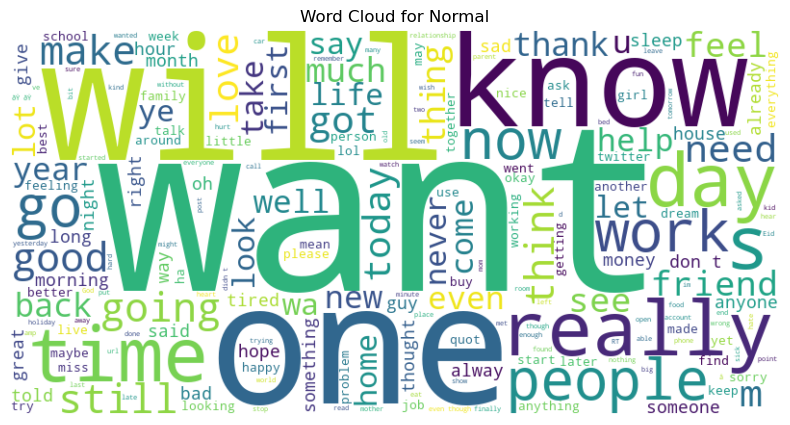

Top 25 words for class Depression: [('i', 89965), ('to', 39125), ('and', 33590), ('my', 22669), ('a', 21976), ('the', 21778), ('not', 17026), ('am', 15729), ('it', 15703), ('of', 15500), ('is', 15205), ('have', 14773), ('do', 13351), ('just', 11830), ('that', 11703), ('me', 11676), ('but', 11450), ('in', 11389), ('for', 10478), ('so', 8902), ('like', 8891), ('feel', 8782), ('this', 8395), ('with', 7772), ('be', 7032)]


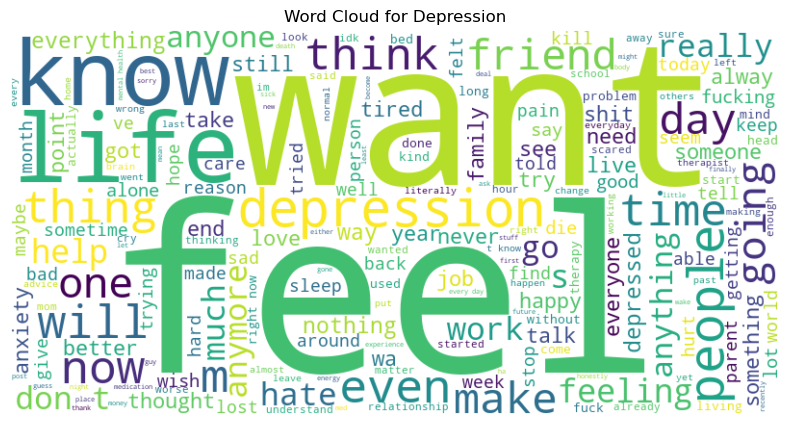

Top 25 words for class Suicidal: [('i', 62667), ('to', 28520), ('and', 20396), ('my', 14814), ('not', 14373), ('am', 14208), ('the', 14178), ('a', 12948), ('is', 10963), ('do', 10894), ('have', 10534), ('of', 9725), ('it', 9661), ('just', 8097), ('me', 7680), ('that', 7051), ('but', 6928), ('in', 6583), ('want', 6389), ('for', 6219), ('so', 6187), ('this', 5530), ('be', 5274), ('like', 4418), ('with', 4072)]


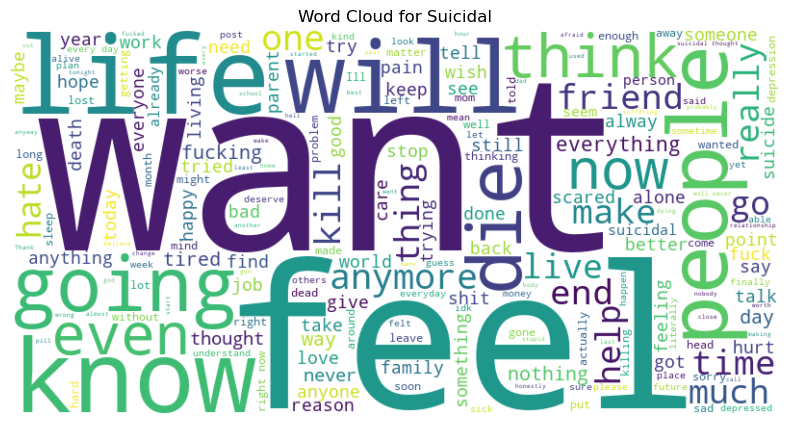

Top 25 words for class Anxiety: [('i', 13715), ('and', 8268), ('to', 6758), ('a', 6158), ('my', 6099), ('the', 6040), ('of', 3975), ('it', 3651), ('have', 2896), ('in', 2790), ('is', 2756), ('but', 2693), ('that', 2627), ('for', 2398), ('this', 2191), ('so', 1915), ('me', 1773), ('just', 1766), ("i'm", 1715), ('with', 1715), ('like', 1687), ('was', 1657), ('on', 1592), ('anxiety', 1591), ('or', 1582)]


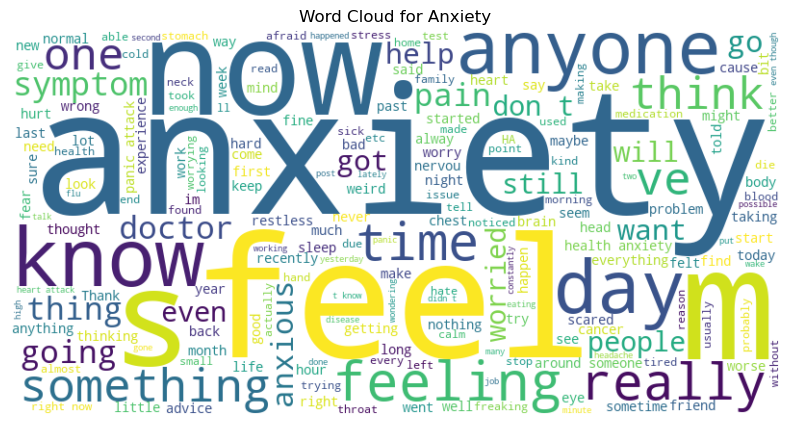

In [29]:
def plot_wordclouds(df, text_col, label_col, top_classes=4, n_words=25):
    classes = df[label_col].value_counts().index[:top_classes]
    for cls in classes:
        text_data = " ".join(df[df[label_col]==cls][text_col].astype(str).values)
        counter = Counter(text_data.lower().split())
        print(f"Top {n_words} words for class {cls}:", counter.most_common(n_words))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for {cls}")
        plt.axis('off')
        plt.show()

plot_wordclouds(df, text_col='statement', label_col='status')

*Decision Note: Understanding the most common words in each sentiment class reveals which terms drive classifications—helping to detect bias, labeling issues, or data leakage. Visualizing word frequencies and word clouds provides intuition for meaningful features and guides preprocessing choices.*


## 9. Text Length Distribution by Class
This section compares the distribution of statement lengths within each sentiment class using boxplots. By visualizing text lengths, we can identify whether any classes contain systematically longer or shorter entries, which may impact modeling or signal annotation issues.

Process Start: Plotting text length distribution by class...


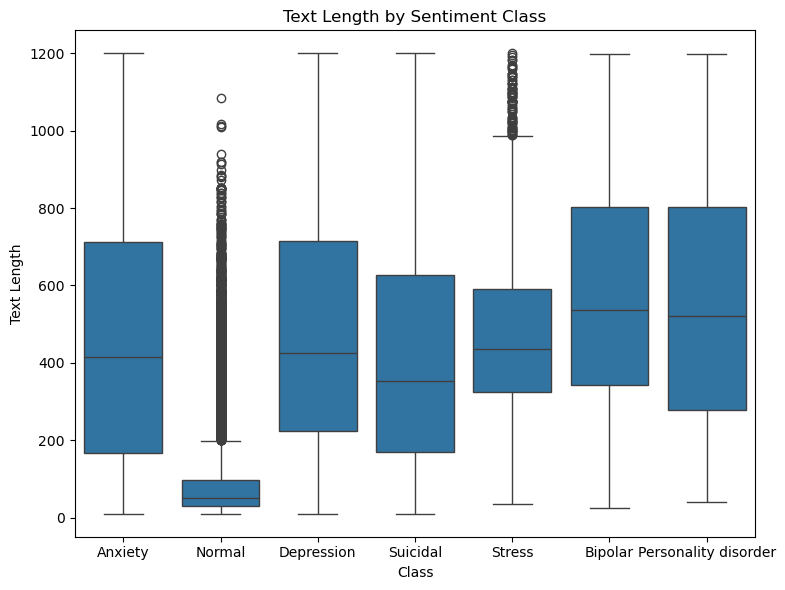

✓ Boxplot analysis complete (Time taken: 0.20s)



In [31]:
print("Process Start: Plotting text length distribution by class...")
start = time.time()

df['text_length'] = df['statement'].str.len()
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='status', y='text_length')
plt.title('Text Length by Sentiment Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

print(f"✓ Boxplot analysis complete (Time taken: {time.time()-start:.2f}s)\n")


*Decision Note: Analyzing text length distribution for each class ensures there is no unintended bias or preprocessing issue affecting feature quality—for example, if one class systematically has longer texts it could mislead the model or signal a labeling issue.*

## 10. Top Bigrams and Trigrams
This section extracts and lists the most common bigrams (two-word combinations) and trigrams (three-word combinations) found in the statements of each sentiment class. These frequent phrases help reveal patterns in language use and may inform feature engineering for modeling.
*


In [33]:
def top_ngrams(corpus, n=2, num=15):
    vectorizer = CountVectorizer(ngram_range=(n,n), stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(f"Top {num} {'bigrams' if n==2 else 'trigrams'}: ", words_freq[:num])

print("Process Start: Generating top n-grams (bigrams/trigrams) for each class...")
import time
start = time.time()

for cls in df['status'].unique():
    print('-'*30, f"Class: {cls}")
    top_ngrams(df[df['status']==cls]['statement'], n=2)
    top_ngrams(df[df['status']==cls]['statement'], n=3)
    print()

print(f"✓ Top n-gram extraction complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Generating top n-grams (bigrams/trigrams) for each class...
------------------------------ Class: Anxiety
Top 15 bigrams:  [('feel like', 394), ('health anxiety', 379), ('don know', 351), ('feels like', 163), ('panic attack', 133), ('panic attacks', 122), ('don want', 101), ('heart attack', 93), ('just want', 81), ('ve having', 80), ('really bad', 79), ('weeks ago', 79), ('heart rate', 79), ('amp x200b', 77), ('feeling like', 70)]
Top 15 trigrams:  [('year old male', 24), ('ve health anxiety', 20), ('https imgur com', 20), ('having heart attack', 20), ('anxiety panic attacks', 17), ('year old female', 16), ('high blood pressure', 16), ('health anxiety ve', 16), ('long story short', 16), ('swollen lymph node', 15), ('anxiety health anxiety', 14), ('feel like going', 14), ('just don know', 13), ('health anxiety just', 13), ('20 year old', 12)]

------------------------------ Class: Normal
Top 15 bigrams:  [('ðÿ ðÿ', 183), ('don know', 157), ('feel like', 130), ('don want',

*Decision Note: Multi-word phrases (n-grams) often reveal stronger signals than single words—especially in sentiment data. Examining bigrams and trigrams highlights common expressions, idioms, or repeated spam, strengthening feature selection and interpretation.*

## 11. Outlier and Special Character Analysis
This section detects and counts statements containing URLs, emojis or special characters, and excessive punctuation throughout the dataset. By identifying these outliers, we safeguard the modeling pipeline from potential noise and flag samples for further cleaning or manual review.

In [35]:
print("Process Start: Detecting URLs, emoji/special characters, and excessive punctuation in text...")
import time
start = time.time()

def contains_url(text):
    return bool(re.search(r'https?://\S+|www\.\S+', text))

def contains_emoji(text):
    # Matches anything that's not a word, space, or common punctuation (rough proxy for emojis/symbols)
    return bool(re.search(r'[^\w\s,.;:?!]', text))

def contains_many_punct(text):
    return bool(re.search(r'[!?.]{5,}', text))

df['has_url'] = df['statement'].apply(contains_url)
df['has_emoji'] = df['statement'].apply(contains_emoji)
df['has_many_punct'] = df['statement'].apply(contains_many_punct)

print("Statements with URLs:", df['has_url'].sum())
print("Statements with emojis/special:", df['has_emoji'].sum())
print("Statements with excess punctuation:", df['has_many_punct'].sum())
print(f"✓ Detection/flagging complete (Time taken: {time.time()-start:.2f}s)\n")

Process Start: Detecting URLs, emoji/special characters, and excessive punctuation in text...
Statements with URLs: 661
Statements with emojis/special: 21057
Statements with excess punctuation: 279
✓ Detection/flagging complete (Time taken: 0.45s)




*Decision Note: Outliers and abnormal statements (e.g., excessive punctuation, emojis, links) can distort analysis and model results. Detecting these ensures cleaner features and flags samples for potential review or correction.*


### Interpretation

Many statements use emojis or special characters, which shows the data is expressive and informal. A small number contain URLs, so some texts link to outside sources and might be less relevant for sentiment analysis. Excess punctuation is uncommon and could show strong emotion. These patterns suggest most data is conversational but may need cleaning for modeling.
